# Dataset Exploration – LOL Dataset

## Objective
This notebook explores the LOL (Low-Light) dataset to understand illumination degradation,
contrast loss, and structural challenges faced by object detection models in low-light images.
This analysis motivates the need for a dedicated image enhancement stage.


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
BASE_PATH = "../TotalLoL"

TRAIN_LOW = os.path.join(BASE_PATH, "train", "low")
TRAIN_HIGH = os.path.join(BASE_PATH, "train", "high")

TEST_LOW = os.path.join(BASE_PATH, "test", "low")
TEST_HIGH = os.path.join(BASE_PATH, "test", "high")

print("Train low exists:", os.path.exists(TRAIN_LOW))
print("Train high exists:", os.path.exists(TRAIN_HIGH))
print("Test low exists:", os.path.exists(TEST_LOW))
print("Test high exists:", os.path.exists(TEST_HIGH))


Train low exists: True
Train high exists: True
Test low exists: True
Test high exists: True


In [3]:
def load_image(path):
    img = cv2.imread(path)
    if img is None:
        return None
    return img


def show_image(img, title):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()


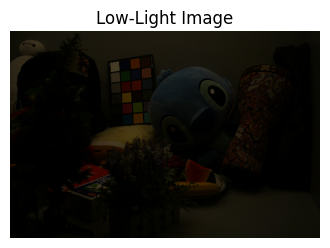

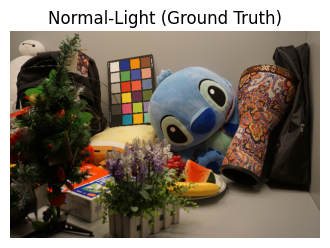

In [6]:
low_images = sorted(os.listdir(TRAIN_LOW))
high_images = sorted(os.listdir(TRAIN_HIGH))

low_img_path = os.path.join(TRAIN_LOW, low_images[201])
high_img_path = os.path.join(TRAIN_HIGH, high_images[201])

low_img = load_image(low_img_path)
high_img = load_image(high_img_path)

show_image(low_img, "Low-Light Image")
show_image(high_img, "Normal-Light (Ground Truth)")


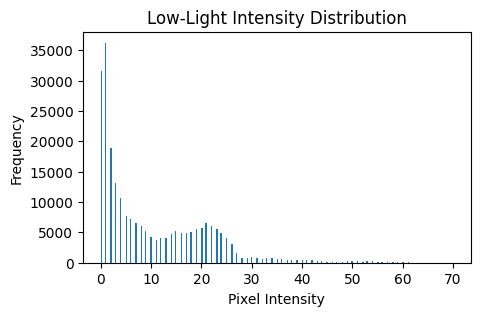

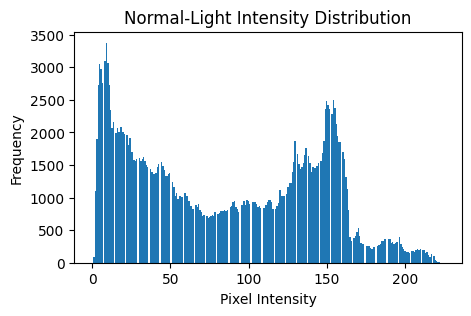

In [7]:
def plot_intensity_histogram(img, title):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.figure(figsize=(5,3))
    plt.hist(gray.ravel(), bins=256)
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()


plot_intensity_histogram(low_img, "Low-Light Intensity Distribution")
plot_intensity_histogram(high_img, "Normal-Light Intensity Distribution")



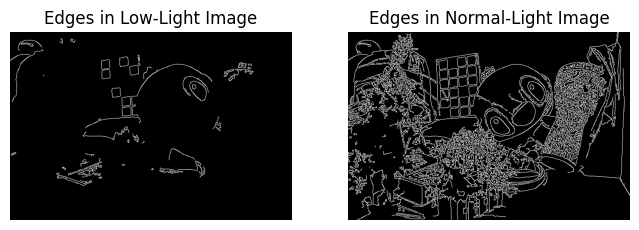

In [8]:
edges_low = cv2.Canny(cv2.cvtColor(low_img, cv2.COLOR_BGR2GRAY), 50, 150)
edges_high = cv2.Canny(cv2.cvtColor(high_img, cv2.COLOR_BGR2GRAY), 50, 150)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.imshow(edges_low, cmap="gray")
plt.title("Edges in Low-Light Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(edges_high, cmap="gray")
plt.title("Edges in Normal-Light Image")
plt.axis("off")

plt.show()


In [9]:
def contrast_metric(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray.std()

print("Contrast (Low-Light):", contrast_metric(low_img))
print("Contrast (Normal-Light):", contrast_metric(high_img))


Contrast (Low-Light): 10.866844618059813
Contrast (Normal-Light): 58.282133808967465


## Observations

- Low-light images have most pixel intensities concentrated in dark regions.
- Edge information is weak and partially missing in low-light images.
- Noise is more visible in shadow regions.
- Contrast is significantly lower compared to normal-light images.
- These factors negatively affect feature extraction in object detection models.


## Conclusion

The LOL dataset clearly demonstrates the challenges of low-light imaging.
Restoring illumination while preserving edges is essential for improving downstream
object detection performance. This motivates the use of a Retinex-based image
enhancement network in the next stage.
